# 분류 및 예측 2 
# 의사결정나무(Decision Tree)
## R을 활용한 의사결정나무 실습

<img src="photo/1.PNG">

## Using "C50", "caret" & "ROCR" packages

 - createDataPartition() - caret package
 - C5.0() - C50 package
 - summary() - C50 package
 - C5imp() - C50 package
 - plot() - C50 package
 - predict() - C50 package
 - confusionMatrix() - caret package
 - prediction() - ROCR package
 - performance() - ROCR package
 - plot() - ROCR package

In [2]:
library(C50)
library(caret)
library(ROCR)

In [3]:
cb <- read.delim("Hshopping.txt",stringsAsFactors = F)
cb$반품여부 <- as.factor(cb$반품여부)

In [14]:
colnames(cb) <- c("ID","SEX","AGE","AMT","APP","REFUND")

In [15]:
head(cb)

,ID,SEX,AGE,AMT,APP,REFUND
1,1,1,33,2,2,0
2,2,2,21,3,2,1
3,3,1,45,1,1,0
4,4,1,50,2,1,0
5,5,1,21,3,1,1
6,6,1,22,3,1,1


### train / test data split

In [17]:
set.seed(1) # seed를 고정해야 동일한 샘플링을 가질 수 있다. 
inTrain <- createDataPartition(y=cb$REFUND,p=0.6,list=F)
head(inTrain)

Resample1
4
6
7
9
10
11


In [18]:
cb.train <- cb[inTrain,]
cb.test <- cb[-inTrain,]

In [19]:
dim(cb.train); dim(cb.test)

[1] 301   6

[1] 199   6

### C5.0의 함수 파라미터를 생성하는 함수 C5.0Control
Winnowing
- 입력 필드에 대해서 사전에 필드가 유용한지 측정한 다음 유용하지 않는 경우 배제하고 모델링
 - 입력필드가 많을 경우 유용
- 사용법: C5.0Control함수에서 winnow 파라미터를 True로 지정

Pruning severity
- 지역적 가지치기의 강도를 조정
 - 이 값이 작으면 작을수록 가지치기 강도가 강해져서, Over-fitting의 가능성이 적어지지만,대신 가지가 적게 되어 정확도가 떨어질 수 있음
- 사용법: C5.0Control함수에서 CF 파라미터를 0에서 1사이의 값으로 설정(default는 0.25)

Global Pruning
- 전역적 가지치기 여부를 결정
 - 전역적 가지치기는 전체적으로 만들어진 Tree 구조에서 가지치기를 수행하는데 강도가 약한 sub-tree자체를 삭제
- 사용법: C5.0Control함수에서 noGlobalPruning 파라미터를 설정(default는 FALSE)


In [20]:
c5_options <- C5.0Control(winnow = FALSE, noGlobalPruning = FALSE)
c5_model <- C5.0(REFUND ~ SEX+AGE+AMT+APP, data=cb.train,control=c5_options, rules=FALSE)

In [21]:
summary(c5_model)


Call:
C5.0.formula(formula = REFUND ~ SEX + AGE + AMT + APP, data = cb.train,
 control = c5_options, rules = FALSE)


C5.0 [Release 2.07 GPL Edition]  	Sat Oct 22 22:51:56 2016
-------------------------------

Class specified by attribute `outcome'

Read 301 cases (5 attributes) from undefined.data

Decision tree:

AGE <= 29: 1 (77/11)
AGE > 29:
:...APP <= 1: 0 (156/4)
    APP > 1:
    :...SEX <= 1: 0 (19/2)
        SEX > 1:
        :...AGE <= 36: 1 (19/2)
            AGE > 36: 0 (30/5)


Evaluation on training data (301 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5   24( 8.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   194    13    (a): class 0
	    11    83    (b): class 1


	Attribute usage:

	100.00%	AGE
	 74.42%	APP
	 22.59%	SEX


Time: 0.0 secs


- size : 트리의 깊이 
- 8.0%가 틀리고 92%를 맞췄다. 
- 대각선 194, 83이 맞춘 것이다. 

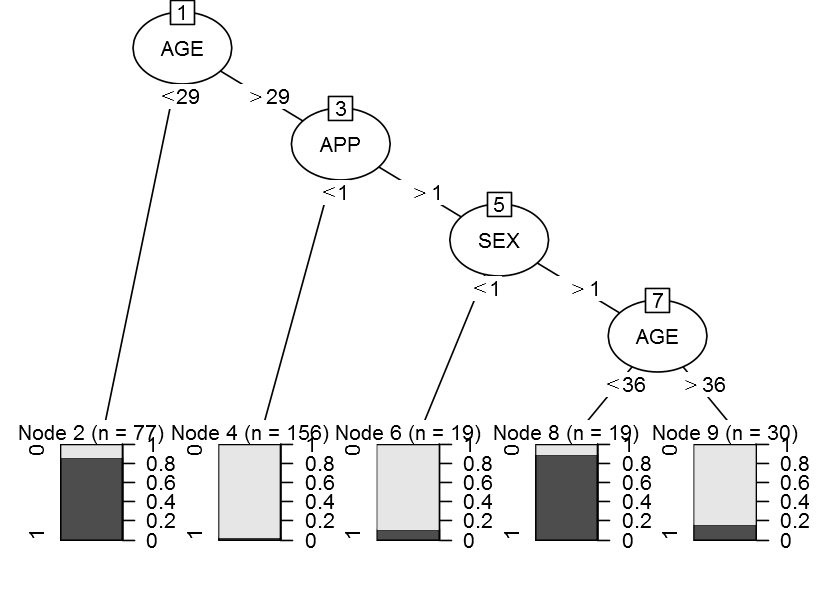

In [26]:
options(repr.plot.height=5)
plot(c5_model)

<img src="photo/2.PNG">
<img src="photo/3.PNG">

In [27]:
c5_model_2 <- C5.0(REFUND ~ SEX+AGE+AMT+APP, data=cb.train,control=c5_options, rules=T)
summary(c5_model_2)


Call:
C5.0.formula(formula = REFUND ~ SEX + AGE + AMT + APP, data = cb.train,
 control = c5_options, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Sat Oct 22 22:55:51 2016
-------------------------------

Class specified by attribute `outcome'

Read 301 cases (5 attributes) from undefined.data

Rules:

Rule 1: (156/4, lift 1.4)
	AGE > 29
	APP <= 1
	->  class 0  [0.968]

Rule 2: (132/4, lift 1.4)
	SEX <= 1
	AGE > 29
	->  class 0  [0.963]

Rule 3: (165/7, lift 1.4)
	AGE > 36
	->  class 0  [0.952]

Rule 4: (71/6, lift 2.9)
	SEX > 1
	AGE <= 36
	APP > 1
	->  class 1  [0.904]

Rule 5: (77/11, lift 2.7)
	AGE <= 29
	->  class 1  [0.848]

Default class: 0


Evaluation on training data (301 cases):

	        Rules     
	  ----------------
	    No      Errors

	     5   24( 8.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   194    13    (a): class 0
	    11    83    (b): class 1


	Attribute usage:

	100.00%	AGE
	 75.42%	APP
	 67.44%	SEX


Time: 0.0 secs


In [29]:
c5_model_3 <- C5.0(REFUND ~ SEX+AGE+AMT+APP, data=cb.train,control=c5_options, rules=F, trials=3)
summary(c5_model_3)


Call:
C5.0.formula(formula = REFUND ~ SEX + AGE + AMT + APP, data = cb.train,
 control = c5_options, rules = F, trials = 3)


C5.0 [Release 2.07 GPL Edition]  	Sat Oct 22 22:56:36 2016
-------------------------------

Class specified by attribute `outcome'

Read 301 cases (5 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

AGE <= 29: 1 (77/11)
AGE > 29:
:...APP <= 1: 0 (156/4)
    APP > 1:
    :...SEX <= 1: 0 (19/2)
        SEX > 1:
        :...AGE <= 36: 1 (19/2)
            AGE > 36: 0 (30/5)

-----  Trial 1:  -----

Decision tree:

AMT <= 1: 0 (139.1/13.4)
AMT > 1:
:...AGE <= 46: 1 (139/52)
    AGE > 46: 0 (22.9/3.6)

-----  Trial 2:  -----

Decision tree:

AGE <= 28: 1 (55.9/6.3)
AGE > 28: 0 (233.1/47.3)


Evaluation on training data (301 cases):

Trial	    Decision Tree   
-----	  ----------------  
	  Size      Errors  

   0	     5   24( 8.0%)
   1	     3   45(15.0%)
   2	     2   41(13.6%)
boost	         26( 8.6%)   <<


	   (a)   (b)    <-classified as

### C5.0 Options
 - CF=0.7 가지치기 정도를 낮춘다. Strict 숫자가 높을 수록 정도를 낮춘다. 
 - Strict 할수록 해당 데이터에 대해서 잘 fitting되지만 다른 데이터에는 좋지 않을 수도있다. 

In [30]:
c5_options_2 <- C5.0Control(winnow = F, noGlobalPruning = F, CF=0.7)
c5_model_4 <- C5.0(REFUND ~ SEX+AGE+AMT+APP, data=cb.train,control=c5_options_2, rules=FALSE)

In [31]:
summary(c5_model_4)


Call:
C5.0.formula(formula = REFUND ~ SEX + AGE + AMT + APP, data = cb.train,
 control = c5_options_2, rules = FALSE)


C5.0 [Release 2.07 GPL Edition]  	Sat Oct 22 22:57:37 2016
-------------------------------

Class specified by attribute `outcome'

Read 301 cases (5 attributes) from undefined.data

Decision tree:

AGE <= 29: 1 (77/11)
AGE > 29:
:...APP <= 1: 0 (156/4)
    APP > 1:
    :...SEX <= 1: 0 (19/2)
        SEX > 1:
        :...AGE <= 36: 1 (19/2)
            AGE > 36:
            :...AMT <= 2: 0 (26/2)
                AMT > 2: 1 (4/1)


Evaluation on training data (301 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6   22( 7.3%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   193    14    (a): class 0
	     8    86    (b): class 1


	Attribute usage:

	100.00%	AGE
	 74.42%	APP
	 22.59%	SEX
	  9.97%	AMT


Time: 0.0 secs


### Global Pruning 전역적 가지치기.
 - 지역적 가지치기는 부모와 자식간의 가지치기 ( 개별 각각으로)
 - 전체 나무 모양을 보고 트리의 깊이가 있어도 해당 부분을 칠수도있다. 

<img src="photo/4.PNG">
<img src="photo/5.PNG">
<img src="photo/6.PNG">
<img src="photo/7.PNG">
<img src="photo/8.PNG">
<img src="photo/9.PNG">

## 반품고객 예측 및 평가 

In [32]:
cb.test$c5_pred <- predict(c5_model,cb.test,type="class")
cb.test$c5_pred_prob <- round(predict(c5_model,cb.test,type="prob"),2)

## 정확도 확인

In [33]:
confusionMatrix(cb.test$c5_pred, cb.test$REFUND)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 124  13
         1  13  49
                                          
               Accuracy : 0.8693          
                 95% CI : (0.8144, 0.9128)
    No Information Rate : 0.6884          
    P-Value [Acc > NIR] : 2.375e-09       
                                          
                  Kappa : 0.6954          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9051          
            Specificity : 0.7903          
         Pos Pred Value : 0.9051          
         Neg Pred Value : 0.7903          
             Prevalence : 0.6884          
         Detection Rate : 0.6231          
   Detection Prevalence : 0.6884          
      Balanced Accuracy : 0.8477          
                                          
       'Positive' Class : 0               
                                          

## 시각적 확인

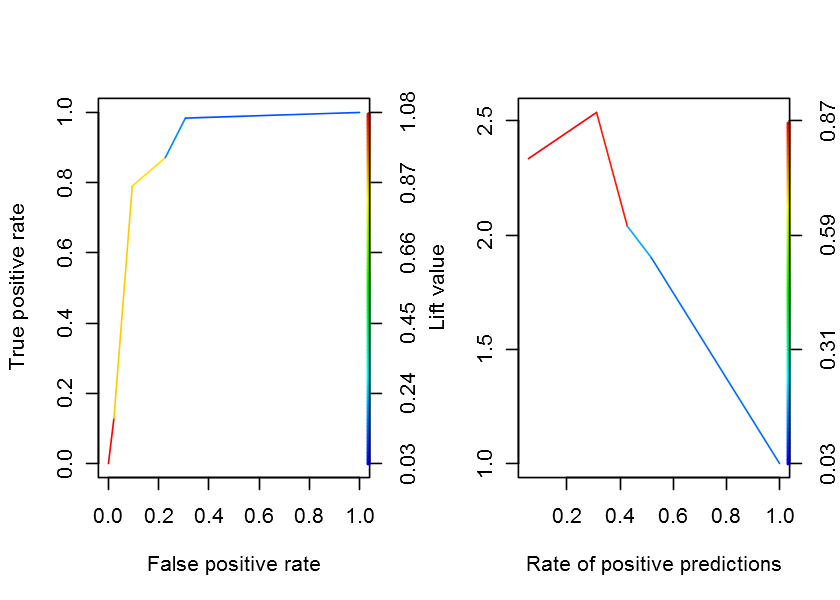

In [35]:
c5_pred <- prediction(cb.test$c5_pred_prob[,2], cb.test$REFUND)
c5_model.perf1 <- performance(c5_pred,"tpr","fpr") # Roc curve
c5_model.perf2 <- performance(c5_pred,"lift","rpp") # Lift chart
par(mfrow=c(1,2))
plot(c5_model.perf1,colorize=T)
plot(c5_model.perf2,colorize=T)

 - 커브 아래의 면적  면적이 높을 수록 좋은 모형이 된다. roccurve에서 
 - lift chart는 급격하게 떨어지면 좋은 모형이다. 

In [36]:
performance(c5_pred,"auc")@y.values[[1]] 

[1] 0.9064045

## 괜찮은 그래프 그리기 

In [38]:
library(Epi)

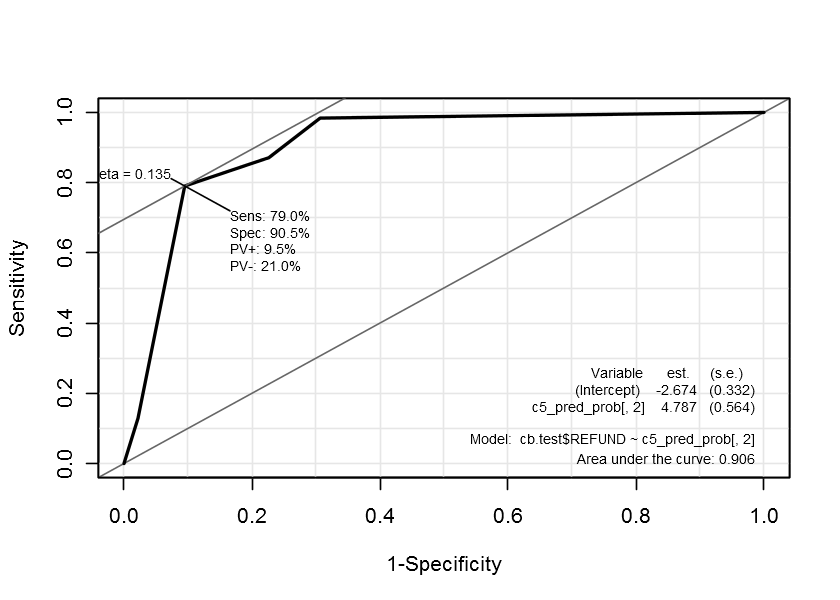

In [40]:
ROC(form=cb.test$REFUND~c5_pred_prob[,2], data=cb.test, plot="ROC")